DEBUG:commons:version: 6.2.4 *
DEBUG:typing:version: 6.2.3
DEBUG:geometry:PyGeometry-z6 version 2.1.4 path /home/be107/DTSimulation/lib/python3.6/site-packages
/home/be107/DTSimulation/lib/python3.6/site-packages/geometry/utils/numpy_backport.py:9: DeprecationWarning: Importing from numpy.testing.utils is deprecated since 1.15.0, import from numpy.testing instead.
  from numpy.testing.utils import assert_allclose  # @UnusedImport
DEBUG:duckietown_world:duckietown-world version 6.2.39 path /home/be107/DTSimulation/lib/python3.6/site-packages
DEBUG:aido_schemas:aido-protocols version 6.0.59 path /home/be107/DTSimulation/lib/python3.6/site-packages
DEBUG:nodes:version 6.2.13 path /home/be107/DTSimulation/lib/python3.6/site-packages pyparsing 3.0.9


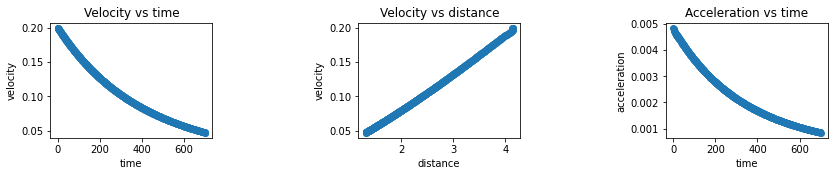

In [1]:
from gym_duckietown.simulator import Simulator
import matplotlib.pyplot as plt
import numpy as np
import math
import duckietown_world

env = Simulator(
        seed=123, # random seed
        map_name="StaticMap",
        max_steps=500001, # we don't want the gym to reset itself
        domain_rand=0,
        camera_width=640,
        camera_height=480,
        accept_start_angle_deg=1,#at close to straight
        full_transparency=True,
        distortion=True,
    )  
    
time = []
angle = []

vel_other = []
vel_main = []

accel_lst_main = []
accel_lst_other = []

dist = []

#initializing the graphs
figure, axis = plt.subplots(1, 3)
plt.subplots_adjust(left=0.1, bottom=0.5, right=1.9, top=0.9, wspace=0.9, hspace=0.9)

#initial parameters for the car
dt = 0
TIME_STEP = 1
obj_dist = 0

speed = 0.2
accel = 0
accel_other = 0

while dt < 2000:
    lane_pose = env.get_lane_pos2(env.cur_pos, env.cur_angle)
    distance_to_road_center = lane_pose.dist
    angle_from_straight_in_rads = lane_pose.angle_rad
    k_p = 10
    k_d = 1
    steering = k_p*distance_to_road_center + k_d*angle_from_straight_in_rads 
    dt = dt + 1

    ###### Getting info to be printed on the graphs
    obs, reward, done, misc = env.step([speed, steering])
    
    info = misc["Simulator"]
    pos = info["cur_pos"]
    time.append(dt)
    
    obj_dist = pos[0] * -1
    for obj in env.objects:
        obj_dist += obj.pos[0]
    
    accel = math.pow(speed, 2) /(2.0 * obj_dist)
    speed -= accel * 0.1 #0.032954733427833
      
    dist.append(obj_dist)
    accel_lst_main.append(accel)
    vel_main.append(speed)
    
    if(speed <= 0):
        speed = 0
    
    env.render()

    if done:
        if reward < 0:
            print('*** CRASHED ***')
        break

axis[0].scatter(time, vel_main)
axis[0].set_title("Velocity vs time")
axis[0].set_xlabel("time")
axis[0].set_ylabel("velocity")

axis[1].scatter(dist, vel_main)
axis[1].set_title("Velocity vs distance")
axis[1].set_xlabel("distance")
axis[1].set_ylabel("velocity")

axis[2].scatter(time, accel_lst_main)
axis[2].set_title("Acceleration vs time")
axis[2].set_xlabel("time")
axis[2].set_ylabel("acceleration")

plt.savefig("Dynamic_Reactive_Graphs/Fig_Save_Test.png")

plt.show()